In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

In [119]:
#loading train dataset saved locally
path = 'data/'
filename = 'named_train.csv'
df = pd.read_csv(path+filename)

In [120]:
#loading test dataset saved locally
path = 'data/'
filename = 'named_test.csv'
df_test= pd.read_csv(path+filename)

In [121]:
#observing the number of observations and features in train dataset
print(f'There are {df.shape[0]} observations and {df.shape[1]} features')

There are 112800 observations and 785 features


In [122]:
#observing the number of observations and features in test dataset
print(f'There are {df_test.shape[0]} observations and {df_test.shape[1]} features')

There are 18800 observations and 785 features


In [123]:
#glimpse of how train dataset looks like
df.head(2)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
#glimpse of how test dataset looks like
df_test.head(2)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
#checking all the columns in train dataset
df.columns.tolist()

['Target',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83',
 'x84',
 'x85',
 'x86',
 'x87',
 'x88',
 'x89',
 'x90',
 'x91',
 'x92',
 'x93',
 'x94',
 'x95',
 'x96',
 'x97',
 'x98',
 'x99',
 'x100',
 'x101',
 'x102',
 'x103',
 'x104',
 'x105',
 'x106',
 'x107',
 'x108',
 'x109',
 'x110',
 'x111',
 'x112',
 'x113',
 'x114',
 'x115',
 'x116',
 'x117',
 'x118',
 'x119',
 'x120',
 'x121',
 'x122',

In [126]:
#checking all the column datatypes in train dataset and all are observed to be int64
df.dtypes

Target    int64
x1        int64
x2        int64
x3        int64
x4        int64
x5        int64
x6        int64
x7        int64
x8        int64
x9        int64
x10       int64
x11       int64
x12       int64
x13       int64
x14       int64
x15       int64
x16       int64
x17       int64
x18       int64
x19       int64
x20       int64
x21       int64
x22       int64
x23       int64
x24       int64
x25       int64
x26       int64
x27       int64
x28       int64
x29       int64
          ...  
x755      int64
x756      int64
x757      int64
x758      int64
x759      int64
x760      int64
x761      int64
x762      int64
x763      int64
x764      int64
x765      int64
x766      int64
x767      int64
x768      int64
x769      int64
x770      int64
x771      int64
x772      int64
x773      int64
x774      int64
x775      int64
x776      int64
x777      int64
x778      int64
x779      int64
x780      int64
x781      int64
x782      int64
x783      int64
x784      int64
Length: 785, dtype: obje

In [127]:
#defining the target variable in train dataset
y_column = 'Target'
y_train = df[y_column]
y_train

0         45
1         36
2         43
3         15
4          4
5         42
6         26
7         32
8         20
9          1
10        46
11        43
12        15
13        13
14        24
15        12
16         5
17        17
18         3
19        40
20        42
21        14
22        14
23        44
24        32
25         3
26        19
27        42
28        29
29        40
          ..
112770    12
112771    11
112772     6
112773    35
112774    14
112775    43
112776    39
112777    16
112778    44
112779    15
112780    35
112781    26
112782     9
112783    19
112784    24
112785     8
112786    39
112787    40
112788     7
112789    26
112790    18
112791    10
112792    19
112793    33
112794     6
112795    22
112796    17
112797    23
112798    31
112799     8
Name: Target, Length: 112800, dtype: int64

In [128]:
# Defining the independent variables in train dataset
x_columns = df.iloc[:, 1:] 
X_train = x_columns
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
#defining the target variable in test dataset
y_column = 'Target'
y_test = df_test[y_column]
y_test

0        41
1        39
2         9
3        26
4        44
5        33
6        14
7        11
8         3
9        12
10       16
11        7
12        2
13       16
14       16
15       27
16        6
17       44
18       28
19       45
20       29
21        8
22        4
23       35
24       39
25       40
26       39
27       33
28       37
29       16
         ..
18770    37
18771     6
18772    12
18773    45
18774     5
18775    24
18776    29
18777     0
18778    22
18779    22
18780    31
18781    31
18782    20
18783     8
18784    44
18785    27
18786    43
18787    40
18788    38
18789    24
18790    33
18791    23
18792    29
18793    37
18794     0
18795    45
18796    15
18797     1
18798    26
18799    33
Name: Target, Length: 18800, dtype: int64

In [130]:
#defining the independent variables in test dataset
x_columns = df_test.iloc[:, 1:] 
X_test = x_columns

In [131]:
X_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
#Building the default Naive Bayes model
mnb = MultinomialNB()

In [133]:
#Fitting the model to the train data
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [134]:
#Using the model to predict on train and test dataset
y_pred_train=mnb.predict (X_train)
y_pred = mnb.predict (X_test)

In [135]:
print ("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print ("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 0.5422429078014185
Test Accuracy: 0.5363829787234042


In [136]:
#calculating precision and recall and printing the results
cm = metrics.confusion_matrix(y_test, y_pred)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("Recall:",np.mean(recall))
print("Precision:",np.mean(precision))

Recall: 0.5363829787234041
Precision: 0.5467075930082986


In [137]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53       400
           1       0.35      0.63      0.45       400
           2       0.71      0.47      0.57       400
           3       0.69      0.76      0.72       400
           4       0.55      0.42      0.48       400
           5       0.72      0.42      0.53       400
           6       0.71      0.63      0.66       400
           7       0.79      0.64      0.70       400
           8       0.45      0.46      0.45       400
           9       0.42      0.69      0.52       400
          10       0.44      0.57      0.50       400
          11       0.45      0.58      0.51       400
          12       0.67      0.58      0.62       400
          13       0.71      0.55      0.61       400
          14       0.70      0.55      0.61       400
          15       0.42      0.27      0.33       400
          16       0.63      0.62      0.63       400
          17       0.56    

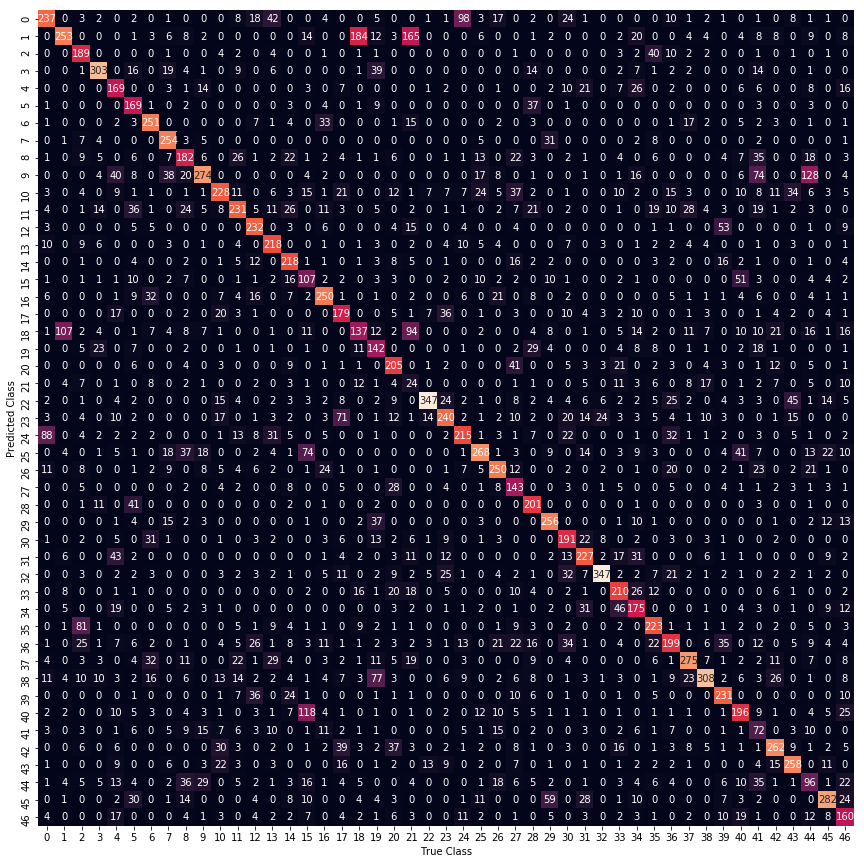

In [138]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()